In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import dask.array as da


In [3]:
from pymks.fmks.bases.primitive import PrimitiveTransformer
from pymks.fmks.correlations import TwoPointCorrelation,FlattenTransformer
from dask_ml.decomposition import PCA
from sklearn.pipeline import Pipeline

In [4]:
from dask.distributed import Client, progress
Client()

<Client: 'tcp://127.0.0.1:37605' processes=4 threads=8, memory=33.59 GB>

In [5]:
bl1 = Pipeline(steps=[
    ("discritize",PrimitiveTransformer(n_state=2, min_=0.0, max_=1.0)),
    ("Correlations",TwoPointCorrelation(periodic_boundary=True, cutoff=15,correlations=[(1,1)])),
    ('flatten', FlattenTransformer()),  
    ('reducer',PCA(n_components=3))])

# There is an issue 

In [6]:
rand_data=da.random.randint(2,size=(100,100,100),chunks=(10,100,100))

In [7]:
rand_data

dask.array<randint, shape=(100, 100, 100), dtype=int64, chunksize=(10, 100, 100), chunktype=numpy.ndarray>

In [8]:
Prim_data=PrimitiveTransformer(n_state=2, min_=0.0, max_=1.0).transform(rand_data)

In [9]:
Prim_data

dask.array<maximum, shape=(100, 100, 100, 2), dtype=float64, chunksize=(10, 100, 100, 2), chunktype=numpy.ndarray>

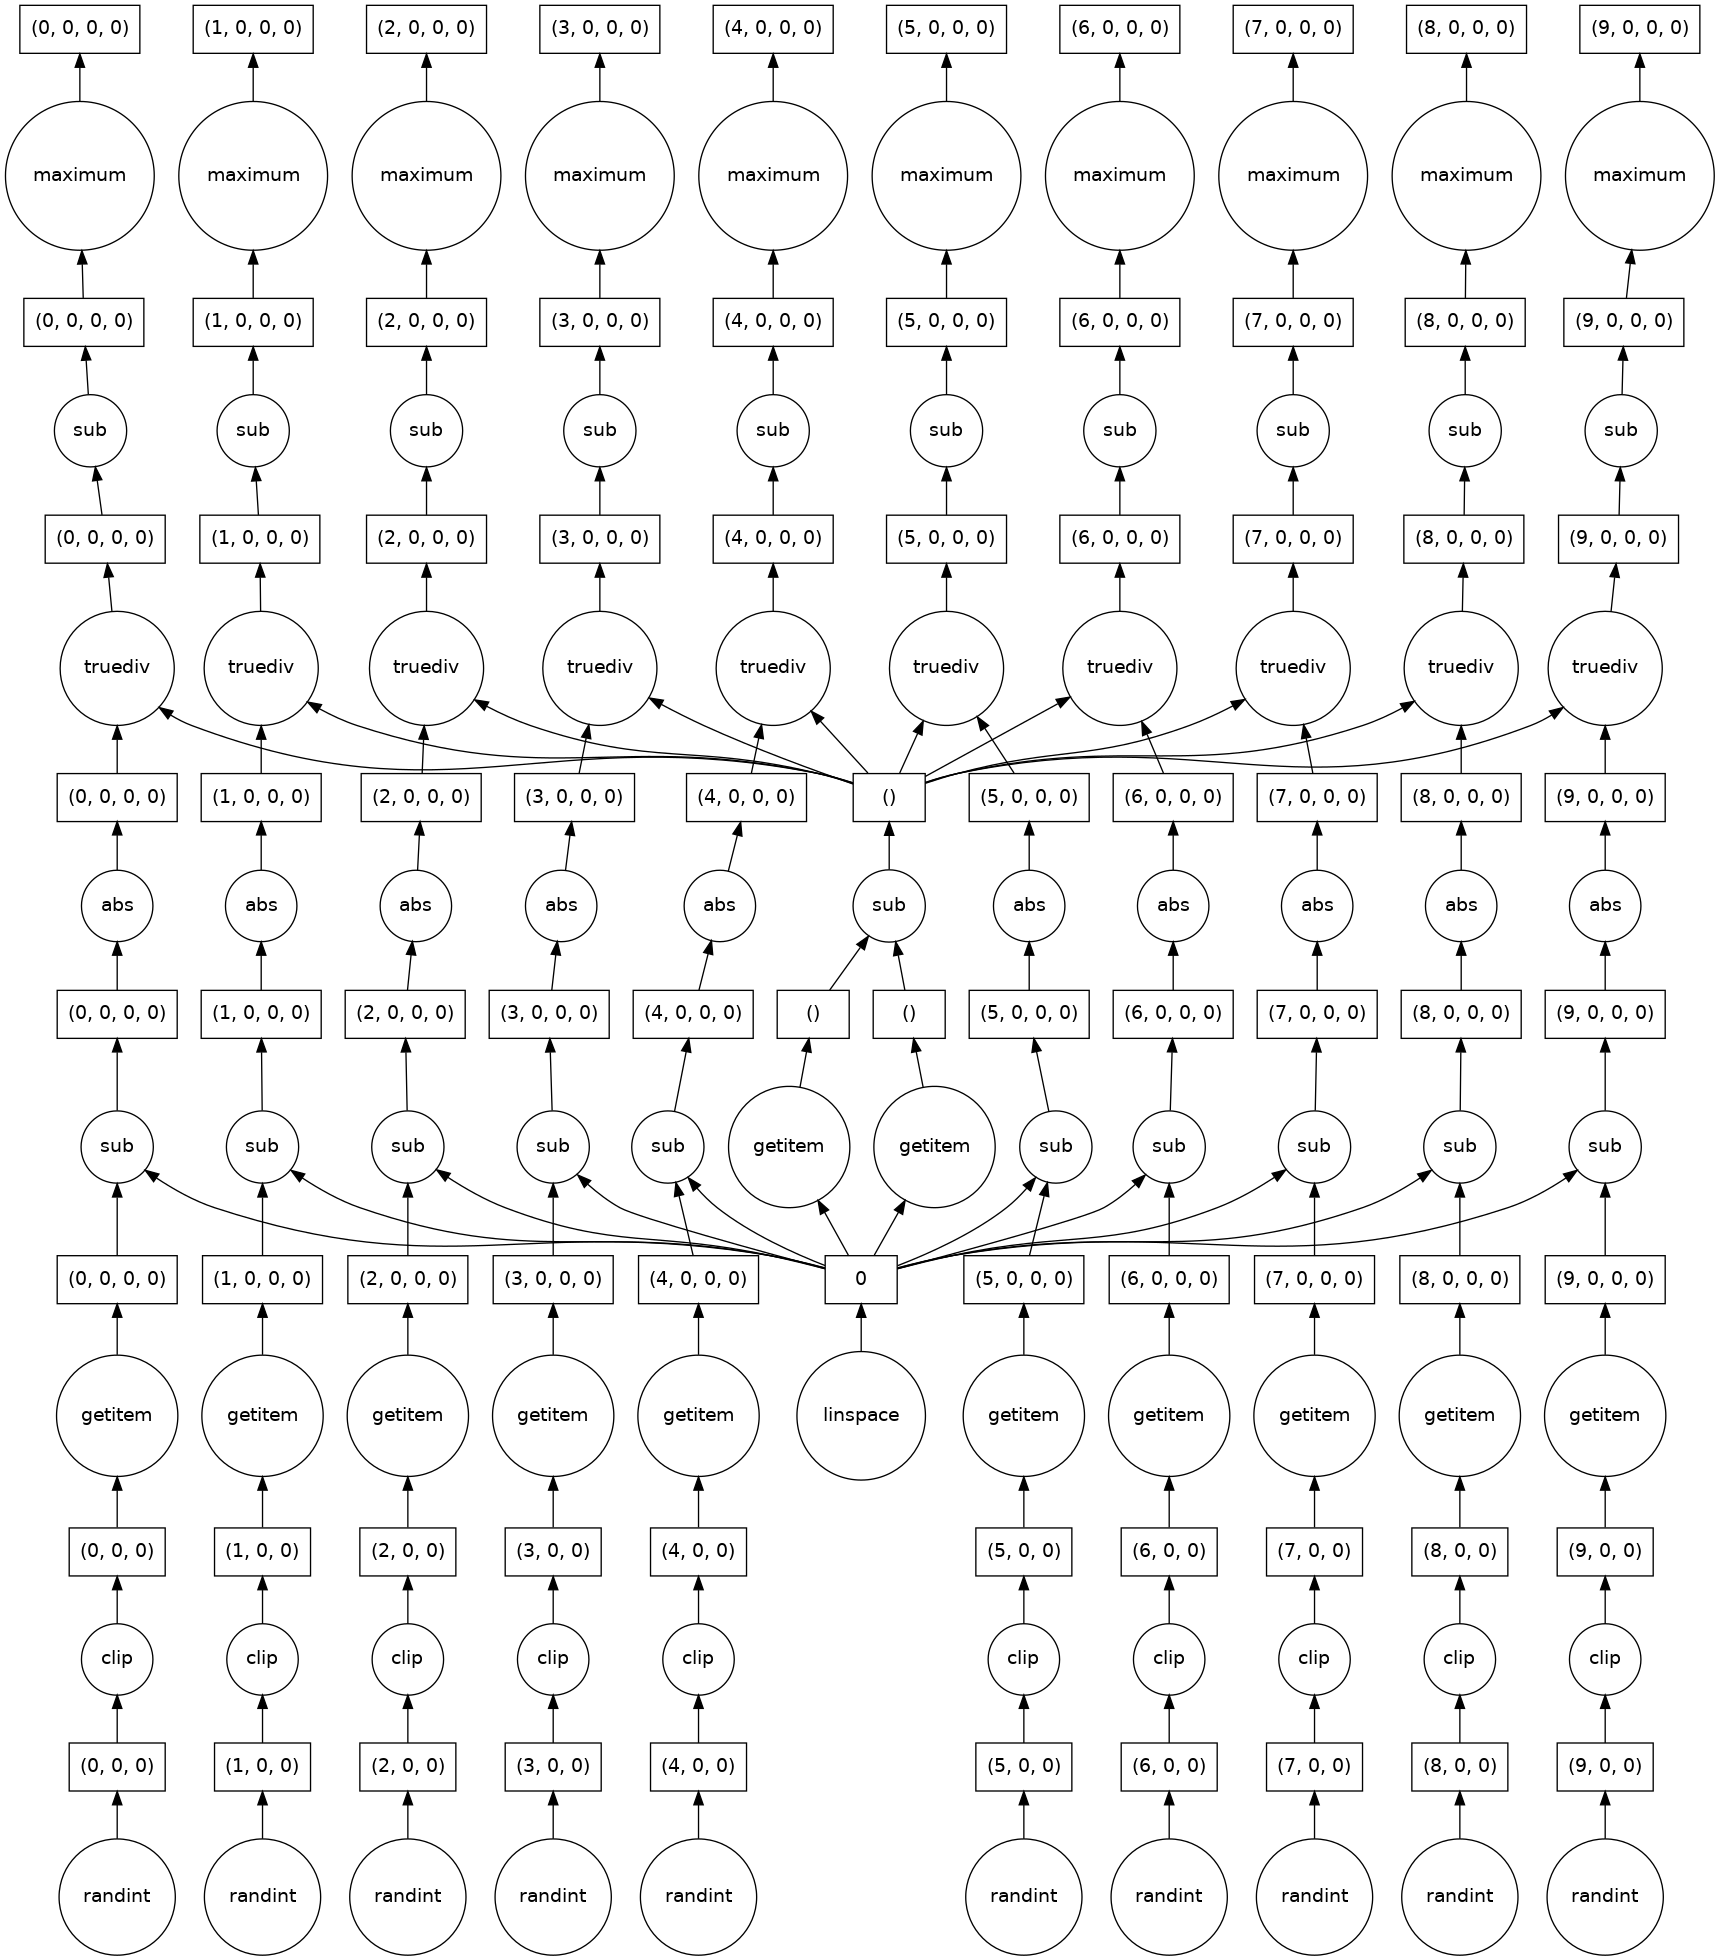

In [10]:
Prim_data.visualize()

In [11]:
two_point_data=TwoPointCorrelation(periodic_boundary=True, cutoff=15,correlations=[(1,1)]).transform(Prim_data)

In [12]:
two_point_data

dask.array<stack, shape=(100, 31, 31, 1), dtype=float64, chunksize=(10, 31, 31, 1), chunktype=numpy.ndarray>

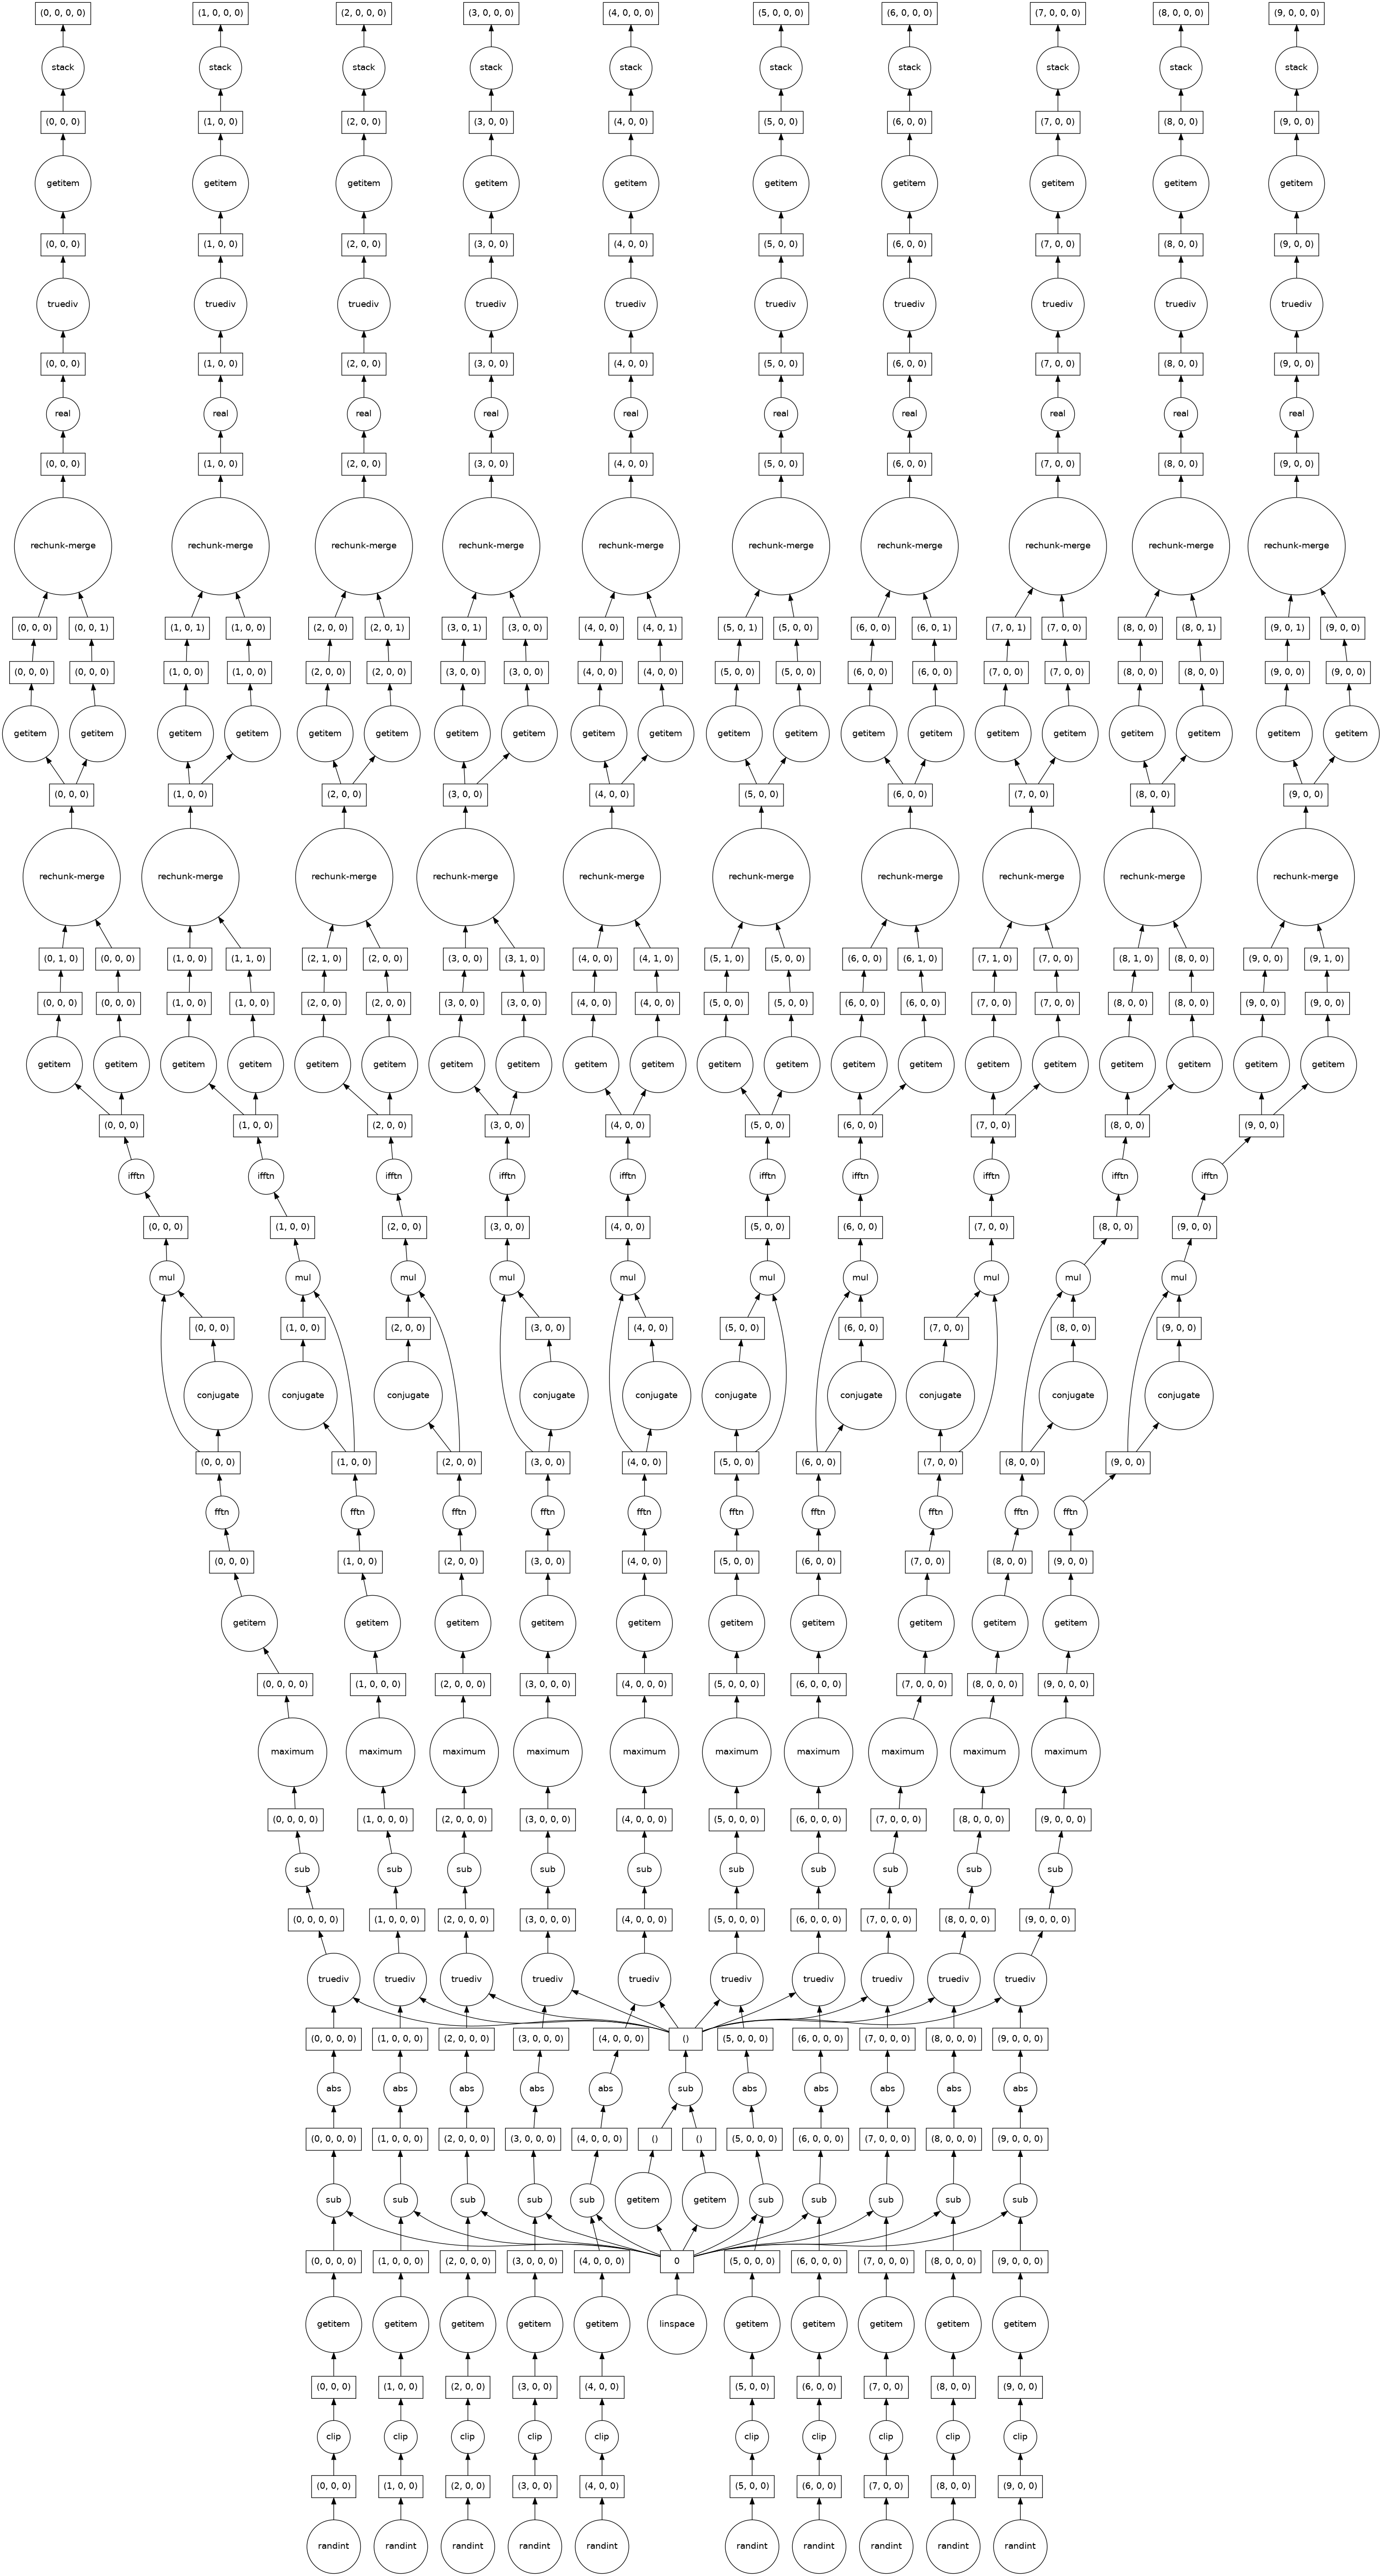

In [13]:
two_point_data.visualize()

In [14]:
from pymks.fmks.correlations import auto_correlation,center_slice,two_point_stats,correlations_multiple

In [15]:
d=two_point_stats(Prim_data,Prim_data)

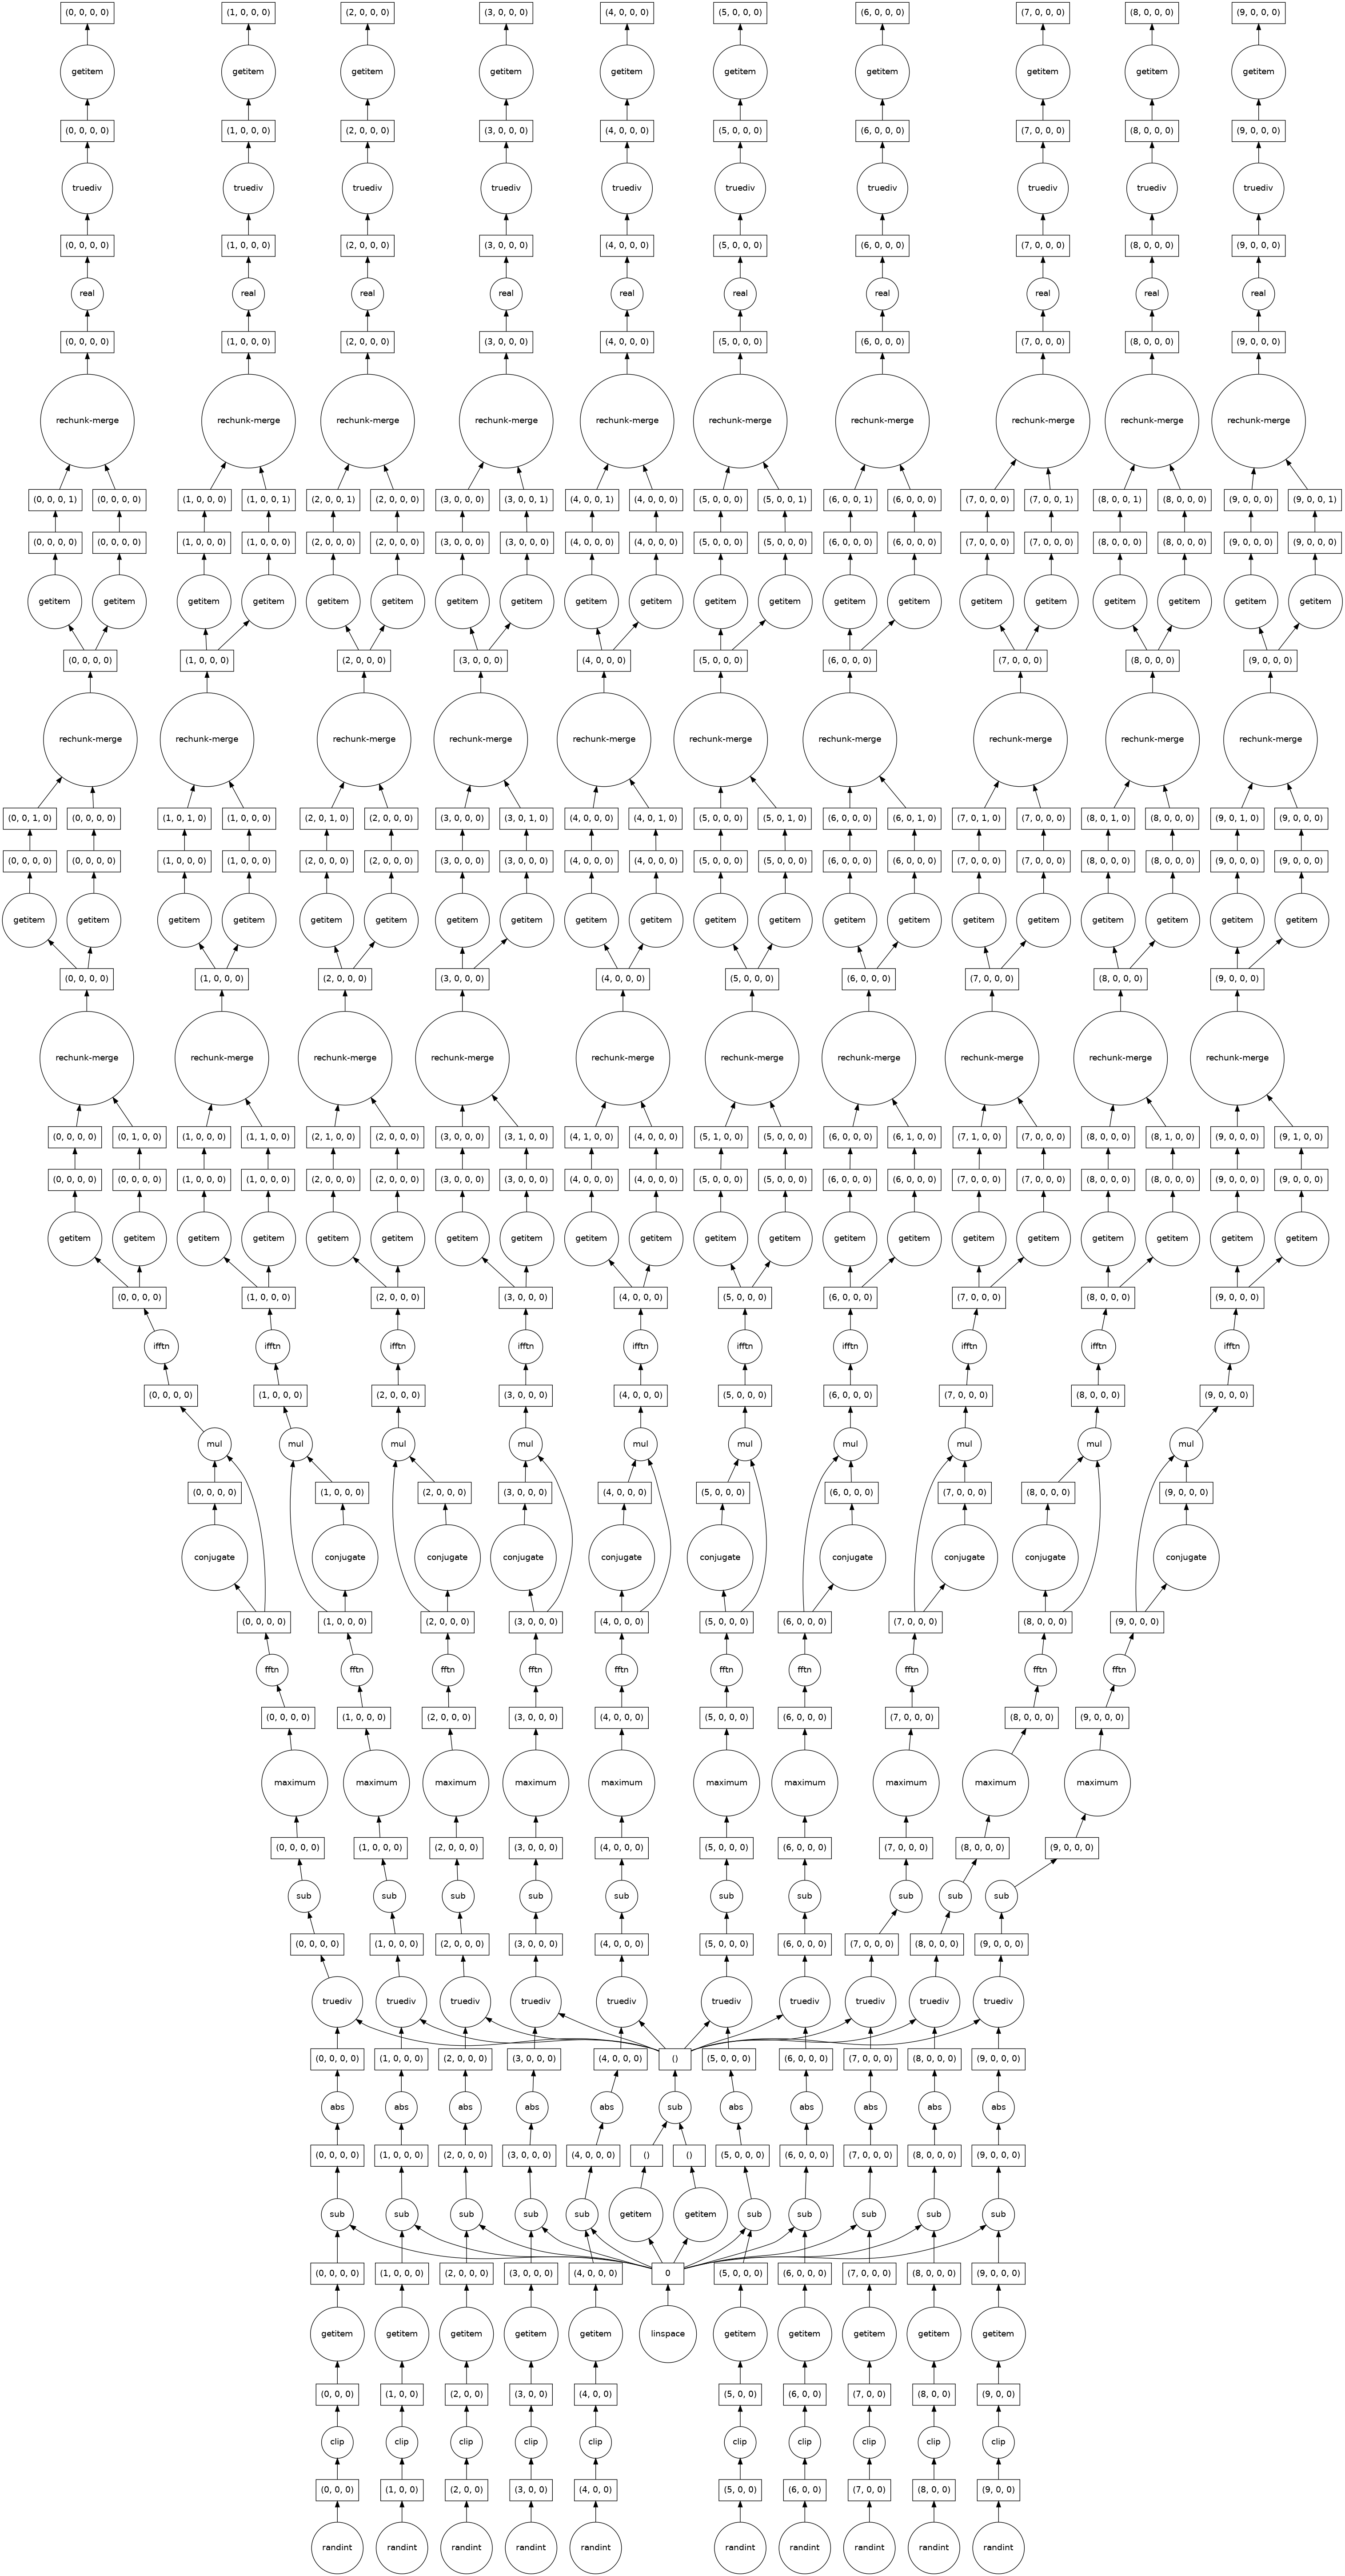

In [16]:
d.visualize()

In [17]:
d=correlations_multiple(Prim_data,periodic_boundary=True, cutoff=None,correlations=[(1,1)])

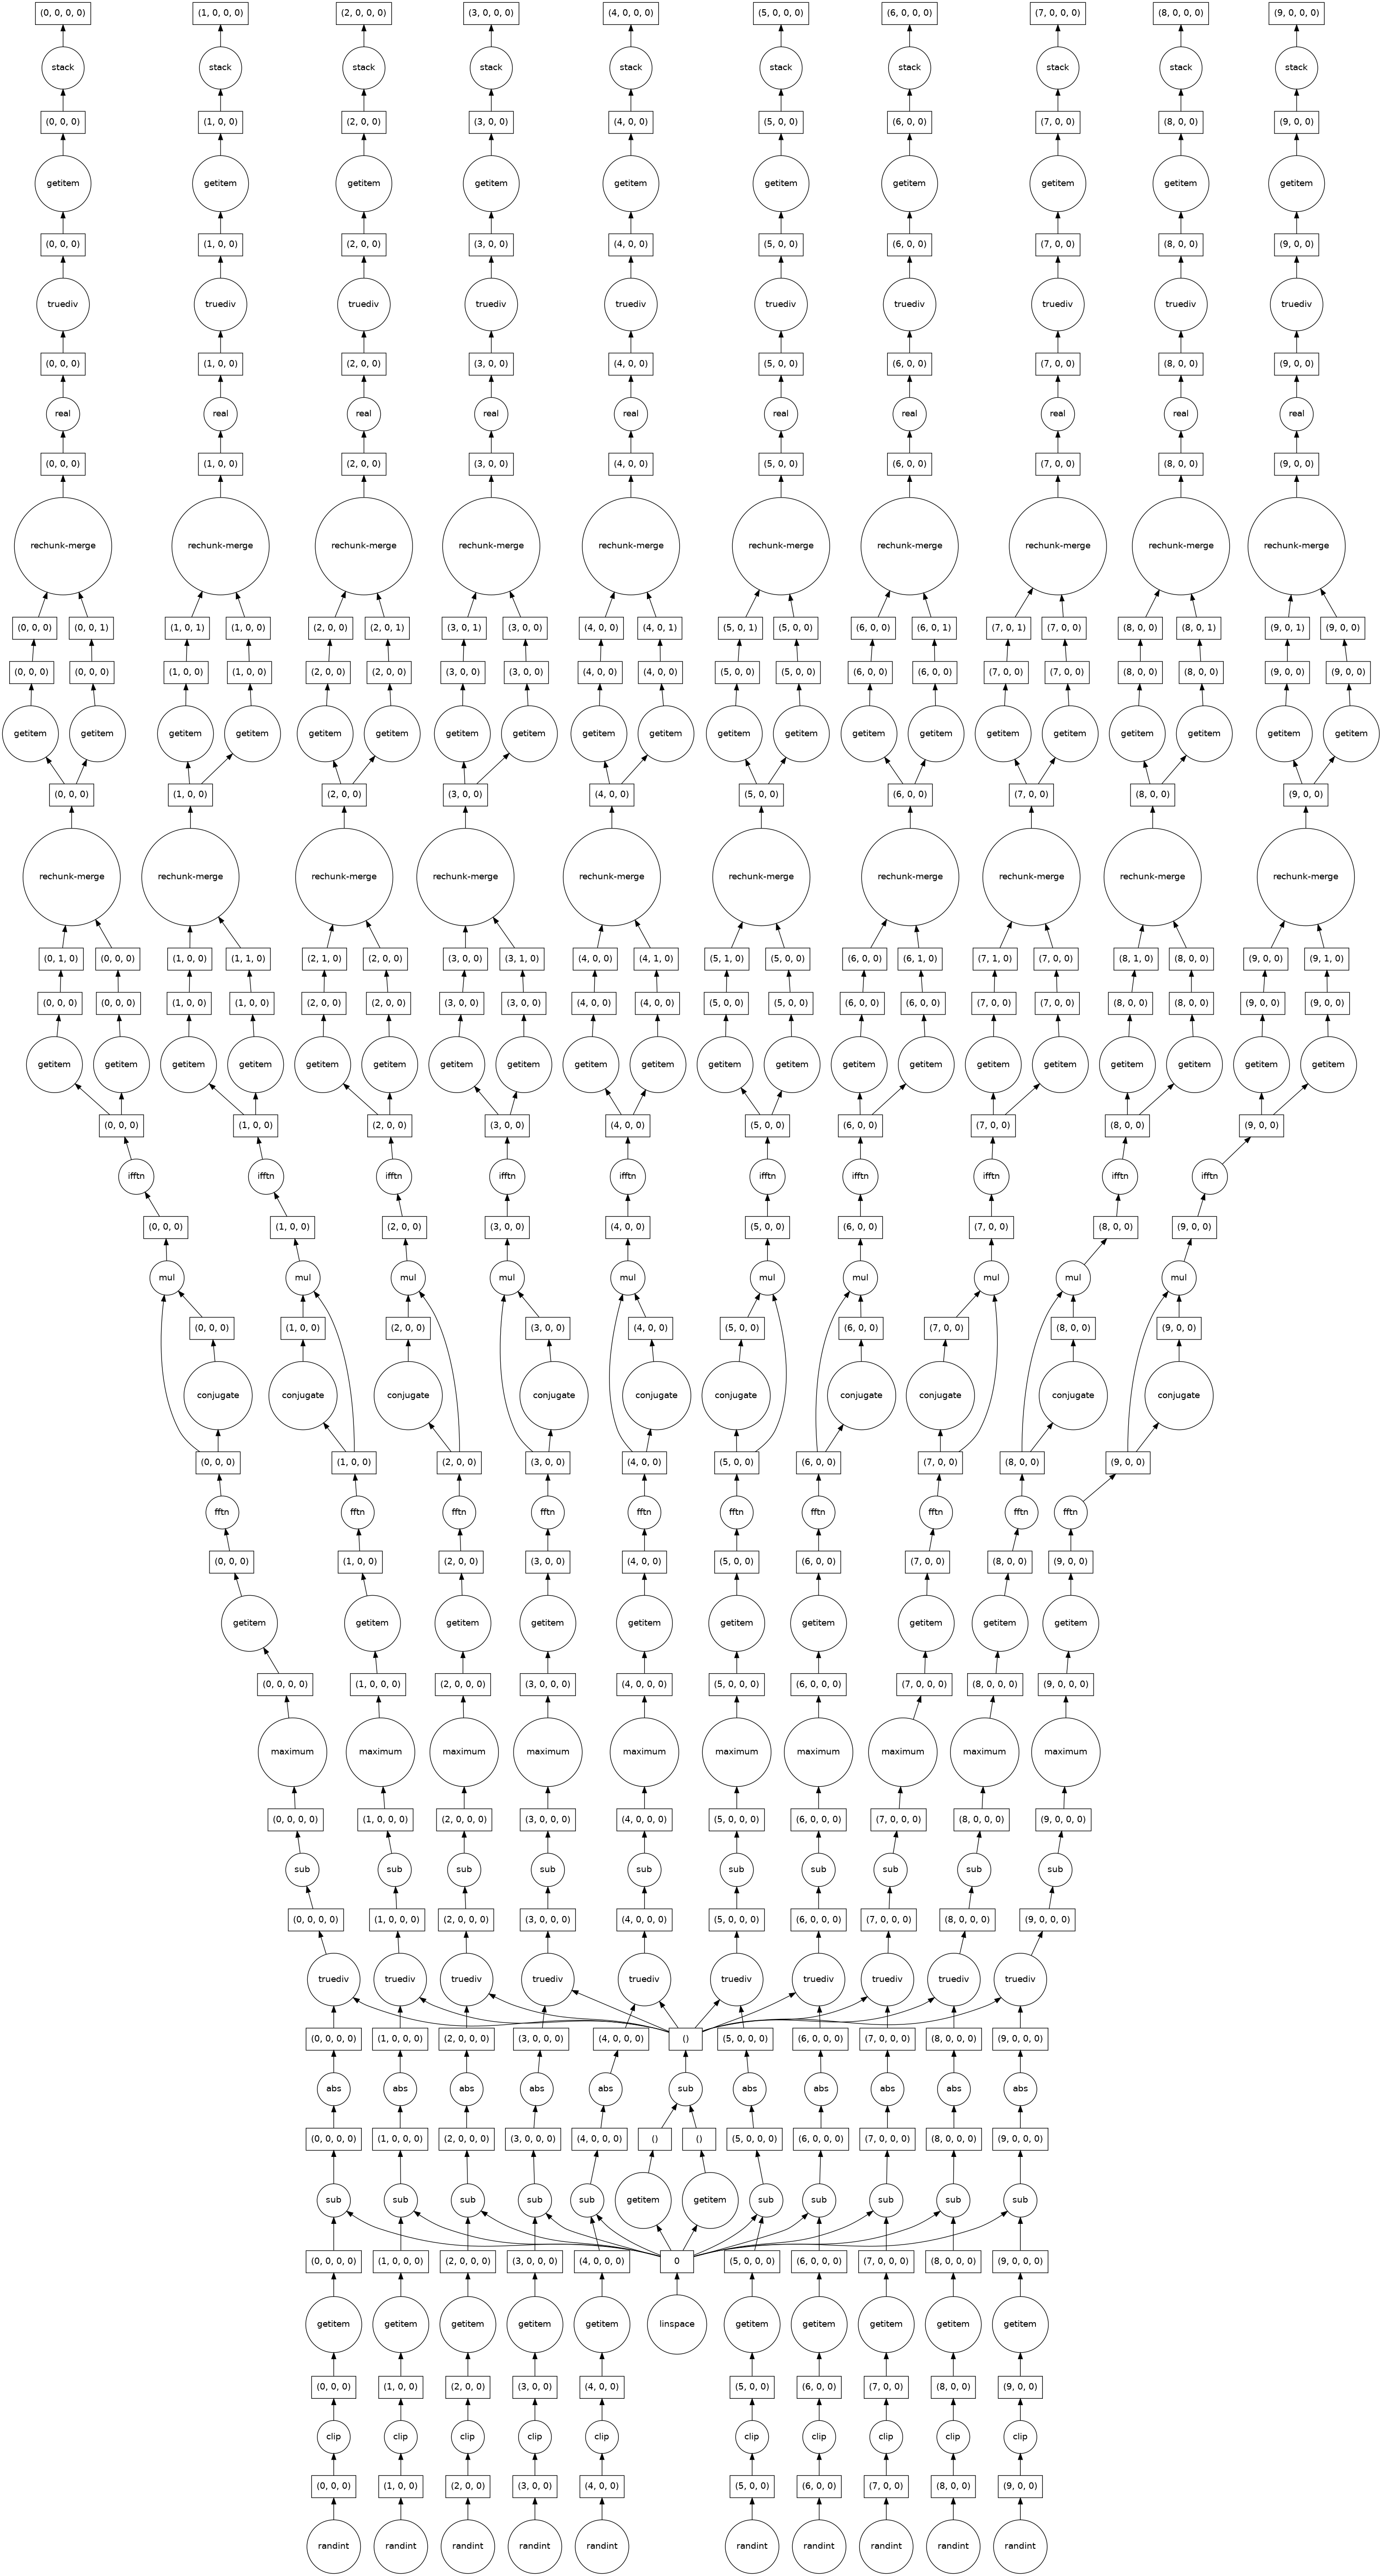

In [18]:
d.visualize()

In [19]:
d

dask.array<stack, shape=(100, 99, 99, 1), dtype=float64, chunksize=(10, 99, 99, 1), chunktype=numpy.ndarray>

In [20]:
import numpy as np
import dask

In [21]:
   
    >>> data = np.arange(18).reshape(1, 3, 3, 2)
    >>> out = correlations_multiple(data, [[0, 1], [1, 1]])
    >>> out

dask.array<stack, shape=(1, 3, 3, 2), dtype=float64, chunksize=(1, 3, 3, 1), chunktype=numpy.ndarray>